Dimensionality Reduction Techniques on digits data.
Dataset consists of hand written digits. Dataset consists of 1797 samples and 64 features (1797,64). There are 10 different classes in th dataset

Import Libraries

In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn import datasets

Load data

In [2]:
digits = datasets.load_digits(n_class=10)
x = digits.data
y = digits.target
print (x.shape)

(1797, 64)


Plot imshow of 10 rows of dataset

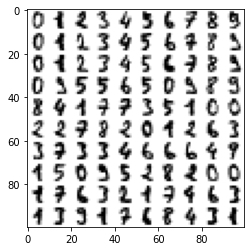

In [3]:
nImagesperRow=10
img=np.zeros((10*nImagesperRow, 10*nImagesperRow))
for i in range(nImagesperRow):
    im = 10 * i + 1
    for j in range(nImagesperRow):
        jm = 10 * j + 1
        img[im:im+8,jm:jm+8]=x[i*nImagesperRow+j].reshape((8,8))
plt.imshow(img, cmap=plt.cm.binary) 

2D plot for visualization. To visualize the data points after applying dimensionality reduction technique

In [4]:
def plot_2d(x, title=None):
    x_min, x_max = np.min(x,axis=0), np.max(x,axis=0)
    x = (x - x_min) / (x_max - x_min)

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for i in range(x.shape[0]):
        ax.text(x[i, 0], x[i, 1],str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if title is not None:
        plt.title(title)

3D plot for visualization. To visualize the data points after applying dimensionality reduction technique

In [5]:
def plot_3d(x, title=None):

    x_min, x_max = np.min(x,axis=0), np.max(x,axis=0)
    x = (x - x_min) / (x_max - x_min)

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    for i in range(x.shape[0]):
        ax.text(x[i, 0], x[i, 1], x[i,2],str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if title is not None:
        plt.title(title)

PCA - Principal Component Analysis.

PCA method is used to reduce the dimension of dataset by transforming the data by projecting the data onto orthogonal axes.

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
starttimePCA = time()
X_PCA = pca.fit_transform(digits.data)
endtimePCA = time()
print("time:", endtimePCA-starttimePCA)
print(X_PCA.shape)

time: 0.03274226188659668
(1797, 3)


Visualiza the data after reducing the dimension of input data using PCA

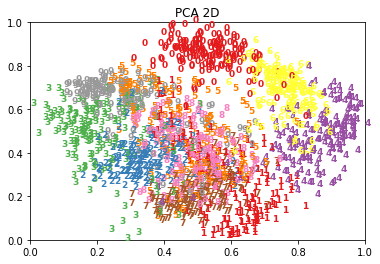

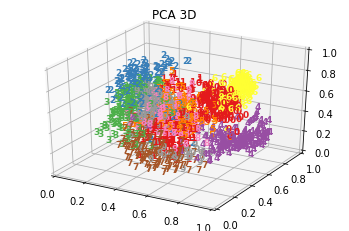

In [27]:
plot_2d(X_PCA[:,0:2], "PCA 2D")
plot_3d(X_PCA, "PCA 3D")

LLE - Local Linear Embedding preserves the local properties of data.


In [31]:
n_neighbors=30
from sklearn.manifold import LocallyLinearEmbedding
# clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,method='standard')
starttimeLLE = time()
lle = LocallyLinearEmbedding(n_neighbors, n_components=3,method='standard')
X_LLE = lle.fit_transform(digits.data)
endtimeLLE = time()
print("time_LLE %.2fs" %(endtimeLLE-starttimeLLE))
print("Reconstruction error: %g" % lle.reconstruction_error_)

time_LLE 1.55s
Reconstruction error: 1.65842e-06


Visualize the reduced datset after applying LLE.

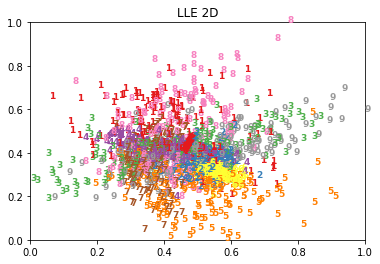

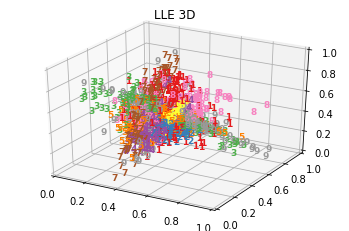

In [32]:
plot_2d(X_LLE, "LLE 2D")
plot_3d(X_LLE, "LLE 3D")

t-SNE - t Distributed Stocastic Neighbor Embedding. 

In [33]:
from sklearn.manifold import TSNE
from sklearn import manifold
starttimetSNE = time()
tsne = manifold.TSNE(n_components=3, init='pca', random_state=0)
X_tSNE = tsne.fit_transform(digits.data)
endtimetSNE = time()
print("time_tSNE %.2fs" %(endtimetSNE-starttimetSNE))

time_tSNE 34.94s


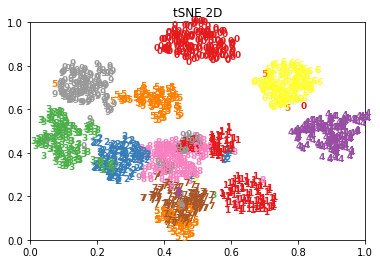

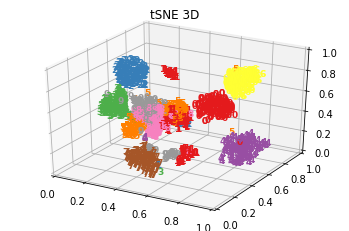

In [34]:
plot_2d(X_tSNE[:,0:2], "tSNE 2D")
plot_3d(X_tSNE, "tSNE 3D")

In t-SNE data points are well segregated clusters after dimensionality reduction on the dataset


ISOMAP - Isometric Mapping

In [35]:
from sklearn.manifold import Isomap
starttimeISOMAP = time()
isomap = manifold.Isomap(n_neighbors, n_components=3)
x_ISOMAP = isomap.fit_transform(digits.data)
endtimeISOMAP = time()
print("time_ISOMAP %.2fs" %(endtimeISOMAP-starttimeISOMAP))

time_ISOMAP 3.72s


Visualize the data from applying dimensionality reduction technique ISOMAP

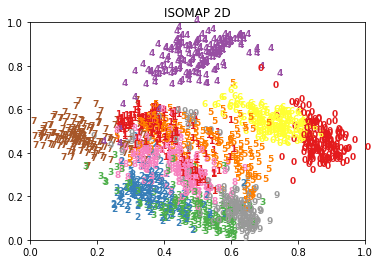

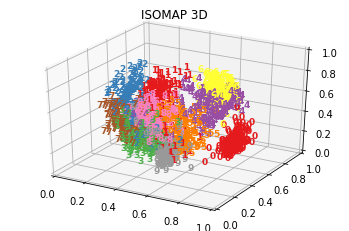

In [36]:
plot_2d(x_ISOMAP[:,0:2], "ISOMAP 2D")
plot_3d(x_ISOMAP, "ISOMAP 3D")

UMAP

In [37]:
pip install umap-learn

In [41]:
import umap.umap_ as umap
starttimeUMAP1 = time()
umap1 = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=0.1,
        n_components=3,
        metric='euclidean'
    )
X_UMAP1 = umap1.fit_transform(digits.data)
endtimeUMAP1 = time()
print("time_UMAP %.2fs" %(endtimeUMAP1-starttimeUMAP1))
print(X_UMAP1.shape)

time_UMAP 9.75s
(1797, 3)


Visualiza the data after appying UMAP for dimensionality reduction

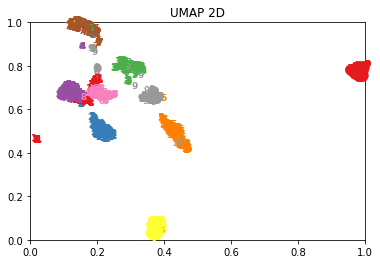

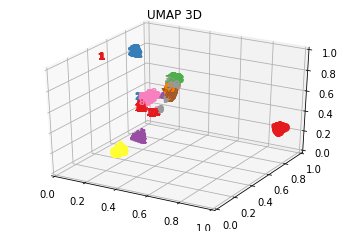

In [42]:
plot_2d(X_UMAP1[:,0:2], "UMAP 2D")
plot_3d(X_UMAP1, "UMAP 3D")

In UMAP data points are form well-segregated clusters.

SVD - Single Value Decomposition

(1797, 64)


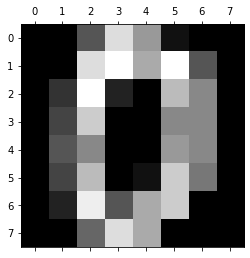

In [43]:
x = digits.data
print(x.shape)
image = x[0]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')


(8, 8)


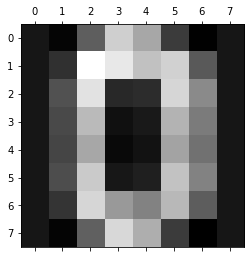

In [44]:
u, s, v = np.linalg.svd(image, full_matrices=True)
S = np.zeros((image.shape[0], image.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)
n_component = 2
S = S[:, :n_component]
VT = v[:n_component, :]
A = u.dot(S.dot(VT))
plt.matshow(A, cmap = 'gray')
print(A.shape)

Image before and after dimenionality reduction. 

In [46]:
from sklearn.decomposition import TruncatedSVD
starttimeSVD = time()
svd = TruncatedSVD(n_components=3)
X_reduced = svd.fit_transform(digits.data)
endtimeSVD = time()
print(X_reduced.shape)
print("time_SVD %.2fs" %(endtimeSVD-starttimeSVD))

(1797, 3)
time_SVD 0.02s


Visualize the data after dimensionality reduction technique SVD

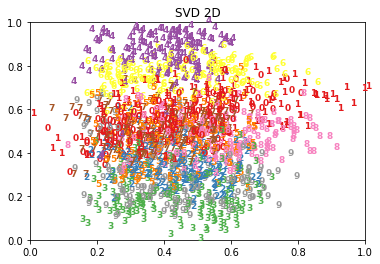

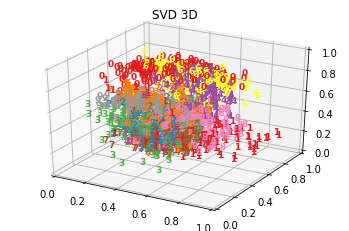

In [47]:
plot_2d(X_reduced[:, :2], "SVD 2D")
plot_3d(X_reduced[:, :3], "SVD 3D")

0.8479585016823408


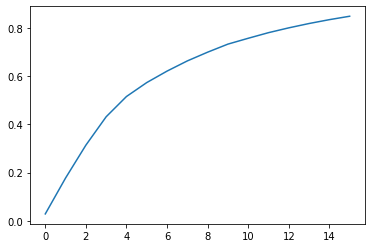

In [48]:
svd1 = TruncatedSVD(n_components=16)
x_SVDreduced = svd1.fit_transform(digits.data)
print(svd1.explained_variance_ratio_.sum())
plt.plot(np.cumsum((svd1.explained_variance_ratio_)))

Conclusion:

Comparing all the dimensionality techniques based on the time take to build the model and reduce the dimensionality of datset, the techniques are arranged in ascending order - SVD<PCA<LLE<ISOMAP<UMAP<tSNE.
Comparing based the components from reduced data and visualization of data after applying technique - UMAP and tSNE are best as the data points form a well segreated clusters. And when comapred between these two techniques UMAP form a segregated clusters.